In [1]:
from pathlib import Path

name = "librispeech-dev-clean"
in_dir = Path("data/dev-clean")
align_dir = Path("data/alignments/dev-clean")
feat_dir = Path("features")
audio_ext = ".flac" 

In [2]:
from utils.features import DataSet

dataset = DataSet(
    name, in_dir, align_dir, feat_dir, audio_ext 
)

gamma = 0.2
out_dir_dusted = Path(f"output/dusted/ladies")
out_dir_hubert = Path(f"output/hubert/ladies")

In [3]:
lady_paths = [
    Path("data/dev-clean/174/50561/174-50561-0005.flac"), 
    Path("data/dev-clean/3081/166546/3081-166546-0058.flac"), 
    Path("data/dev-clean/84/121550/84-121550-0026.flac"),
    Path("data/dev-clean/174/50561/174-50561-0008.flac")
]

In [20]:
from encode import get_units
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(get_units)(dataset, "dusted", lady_paths, gamma, True),  
    delayed(get_units)(dataset, "hubert", lady_paths, save=True)  
])

dusted_words = results[0]
hubert_words = results[1]

Using cache found in /home/danel/.cache/torch/hub/bshall_dusted_main
Using cache found in /home/danel/.cache/torch/hub/bshall_hubert_main
Using cache found in /home/danel/.cache/torch/hub/bshall_dusted_main
Using cache found in /home/danel/.cache/torch/hub/bshall_hubert_main
Getting units: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


In [4]:
from utils.features import load_units_from_paths
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(load_units_from_paths)(dataset, "dusted", lady_paths, gamma=0.2),  
    delayed(load_units_from_paths)(dataset, "hubert", lady_paths)  
])

dusted_words = results[0]
hubert_words = results[1]

Loading Units: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


In [4]:
from utils.features import get_words_and_dist_mat

dusted_words, dist_mat_dusted = get_words_and_dist_mat(dataset, "dusted", out_dir_dusted, "ladies", gamma)
hubert_words, dist_mat_hubert = get_words_and_dist_mat(dataset, "hubert", out_dir_dusted, "ladies")

Getting dusted words: 103it [00:00, 208.55it/s]
Getting hubert words: 103it [00:00, 211.24it/s]


In [6]:
print(dist_mat_dusted[0:5, 0:5])
print(dist_mat_hubert[0:5, 0:5])

[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.         1.         1.        ]
 [1.         1.         0.         1.         0.83333333]
 [1.         1.         1.         0.         0.83333333]
 [1.         1.         0.83333333 0.83333333 0.        ]]
[[0.    1.    1.    1.    1.   ]
 [1.    0.    1.    1.    1.   ]
 [1.    1.    0.    1.    0.875]
 [1.    1.    1.    0.    0.875]
 [1.    1.    0.875 0.875 0.   ]]


In [5]:
from utils.features import display_words

true_words = display_words(dusted_words)

Sorted Word Counts


In [6]:
from distance import calculate_distance

dist_mat_dusted = calculate_distance(dusted_words, out_dir_dusted)
dist_mat_hubert = calculate_distance(hubert_words, out_dir_hubert)

Calculating Distances: 100%|██████████| 5253/5253 [00:00<00:00, 16914.78it/s]


[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.         1.         1.        ]
 [1.         1.         0.         1.         0.83333333]
 [1.         1.         1.         0.         0.83333333]
 [1.         1.         0.83333333 0.83333333 0.        ]]


Calculating Distances: 100%|██████████| 5253/5253 [00:00<00:00, 16563.55it/s]


[[0.    1.    1.    1.    1.   ]
 [1.    0.    1.    1.    1.   ]
 [1.    1.    0.    1.    0.875]
 [1.    1.    1.    0.    0.875]
 [1.    1.    0.875 0.875 0.   ]]


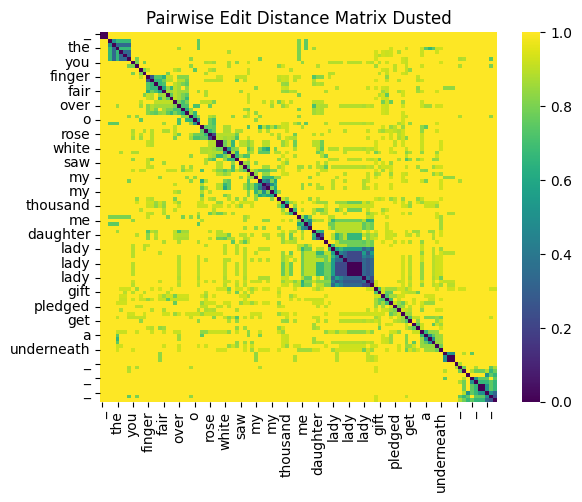

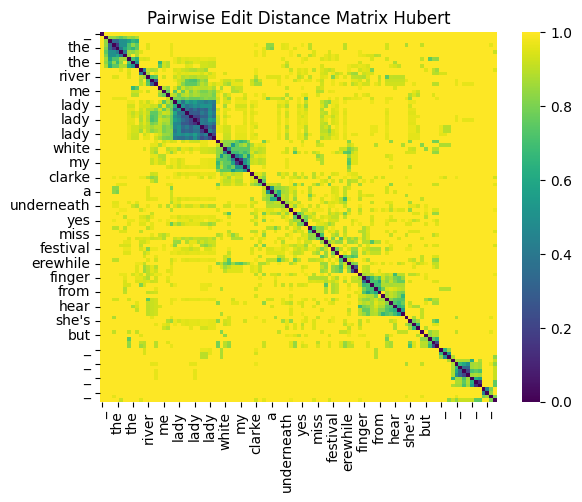

In [7]:
from eval import pairwise_edit_dist_mat

pairwise_edit_dist_mat(dist_mat_dusted, "Pairwise Edit Distance Matrix Dusted", true_words)
pairwise_edit_dist_mat(dist_mat_hubert, "Pairwise Edit Distance Matrix Hubert", true_words)

In [8]:
from cluster import cluster, get_word_clusters

# Get the int_clusters for each of the matrices
dust_clusters = cluster(dist_mat_dusted, 0.3)
hub_clusters = cluster(dist_mat_hubert, 0.3)

# Convert these to word clusters
dust_word_clusters = get_word_clusters(dust_clusters, dusted_words)
hub_word_clusters = get_word_clusters(hub_clusters, hubert_words)

Clustering: 100%|██████████| 103/103 [00:00<00:00, 420655.61it/s]
Getting Word Clusters: 85it [00:00, 70513.42it/s]
Getting Word Clusters: 89it [00:00, 91583.18it/s]


In [9]:
from cluster import get_loaded_clusters

dust_word_clusters = get_loaded_clusters(dusted_words)
hub_word_clusters = get_loaded_clusters(hubert_words)

In [16]:
from eval import ned

# Compute the ned for my dusted and hubert clusters - atm my NED is computed only using clusters with > 1 words
ned_dusted = ned(dust_word_clusters, print_pure=True, print_inpure=True)
print(f"{"-"*100}")
ned_hubert = ned(hub_word_clusters, print_pure=True, print_inpure=True)

print(f"DUSTED NED: {ned_dusted}")
print(f"HuBERT NED: {ned_hubert}")

Calculating NED: 85it [00:00, 113684.90it/s]


Cluster 2: 0
_, _

Cluster 7: 0
_, _

Cluster 8: 0
lady, lady, lady, lady, lady, lady, lady, lady, lady, lady

Cluster 11: 0
roundel, roundel

Cluster 12: 0
rose, rose

Cluster 13: 0
_, _

Cluster 49: 0
_, _

Cluster 52: 0
finger, finger

Cluster 69: 0
my, my

Cluster 73: 4
daughter, water

----------------------------------------------------------------------------------------------------


Calculating NED: 89it [00:00, 219197.33it/s]

Cluster 9: 0
lady, lady, lady, lady

Cluster 12: 0
lady, lady, lady, lady, lady

Cluster 13: 0
roundel, roundel

Cluster 14: 0
rose, rose

Cluster 20: 0
the, the

Cluster 52: 0
_, _

Cluster 73: 0
my, my

Cluster 75: 0
_, _

Cluster 78: 4
daughter, water

DUSTED NED: 0.07407407407407407
HuBERT NED: 0.17391304347826086


In [11]:
from cluster import get_best_clusters

ned_dusted, duplicate_count_dusted, dust_word_clusters = get_best_clusters(dust_word_clusters, ned_dusted, max_iter=10)
print()
ned_hubert, duplicate_counts_hubert, hub_word_clusters = get_best_clusters(hub_word_clusters, ned_hubert, max_iter=10)

Iteration 0: NED: 0.074074, Duplicates: 38


Calculating Cluster Centroids: 85it [00:00, 17737.11it/s]
Calculating NED: 85it [00:00, 412634.07it/s]


Iteration 1: NED: 0.086957
Converged early due to no significant improvement in NED or duplicate count.
Best NED: 0.074074, Best Duplicates: 38

Iteration 0: NED: 0.173913, Duplicates: 42


Calculating Cluster Centroids: 89it [00:00, 19987.85it/s]
Calculating NED: 89it [00:00, 1231990.28it/s]

Iteration 1: NED: 0.173913
Converged early due to no significant improvement in NED or duplicate count.
Best NED: 0.173913, Best Duplicates: 42


In [12]:
from utils.features import store_words

store_words(dust_word_clusters, out_dir_dusted)
store_words(hub_word_clusters, out_dir_hubert)

Wrote words to output/dusted/ladies/words.csv
Wrote words to output/hubert/ladies/words.csv


In [13]:
from eval import words_from_word_units, clusters_purity
            
dust_just_words_clusters = words_from_word_units(dust_word_clusters)
inpurity, total = clusters_purity(dust_just_words_clusters)
print(f"{total} Dusted Clusters with inpurity: {round(inpurity*100, 3)}%")

hub_just_words_clusters = words_from_word_units(hub_word_clusters)
inpurity, total = clusters_purity(hub_just_words_clusters)
print(f"{total} Hubert Clusters with inpurity: {round(inpurity*100, 3)}%")

85 Dusted Clusters with inpurity: 35.294%
89 Hubert Clusters with inpurity: 38.202%


In [14]:
from eval import calculate_duplicate_clusters

cluster_counts_dusted, duplicate_counts_dusted = calculate_duplicate_clusters(dust_word_clusters, print_clusters=True)
print()
cluster_counts_hubert, duplicate_counts_hubert = calculate_duplicate_clusters(hub_word_clusters, print_clusters=True)

Total duplicate clusters (considering word frequency): 38
Duplicate clusters and their counts:
{'you': 1}: 2 times
{'_': 2}: 4 times
{'my': 1}: 2 times
{'a': 1}: 4 times
{'white': 1}: 2 times
{'but': 1}: 2 times
{'the': 1}: 7 times
{'_': 1}: 9 times
{'me': 1}: 2 times
{'i': 1}: 2 times
{'her': 1}: 2 times

Total duplicate clusters (considering word frequency): 42
Duplicate clusters and their counts:
{'you': 1}: 2 times
{'_': 1}: 13 times
{'my': 1}: 2 times
{'a': 1}: 4 times
{'white': 1}: 2 times
{'but': 1}: 2 times
{'the': 1}: 5 times
{'lady': 1}: 2 times
{'me': 1}: 2 times
{'i': 1}: 2 times
{'her': 1}: 2 times
{'_': 2}: 2 times
{'finger': 1}: 2 times
